# Task 1 - Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv('Ranking.csv')
df.info()
df.head(), df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Generated     38 non-null     int64  
 1   Recycling     38 non-null     int64  
 2   Incineration  38 non-null     int64  
 3   Score         38 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.3 KB


(   Generated  Recycling  Incineration  Score
 0        559        150           152   72.9
 1        588        154           226   74.2
 2        416        147           179   83.1
 3        706        183            34   53.3
 4        437          2             1   23.3,
     Generated  Recycling  Incineration  Score
 33        431         87           259   84.8
 34        706        210           333   89.3
 35        424         47             0    0.0
 36        463        126           190   73.4
 37        811        190            95   60.2)

### Predictor and Target Variables
- Target variable: Score
- Predictor variables: Generated, Recycling, Incineration
- Country is not included in this dataset and thus ignored as instructed.

## Data Exploration

In [2]:
df.describe()

,Generated,Recycling,Incineration,Score
count,38.000000,38.000000,38.000000,38.000000
mean,526.578947,136.394737,128.631579,66.639474
std,154.199701,78.085033,116.258431,22.465632
min,243.000000,2.000000,0.000000,0.000000
25%,425.750000,84.500000,33.250000,55.575000
50%,501.000000,128.000000,90.500000,71.950000
75%,623.500000,181.000000,219.000000,83.400000
max,845.000000,302.000000,382.000000,100.000000


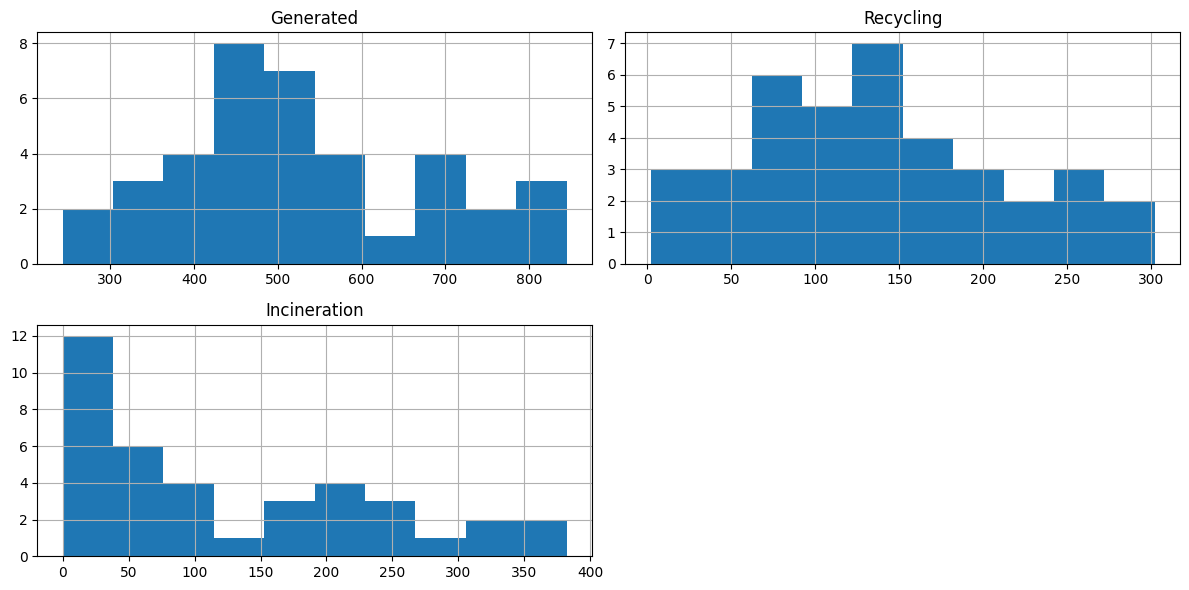

In [3]:
df[['Generated', 'Recycling', 'Incineration']].hist(figsize=(12, 6))
plt.tight_layout()
plt.show() 

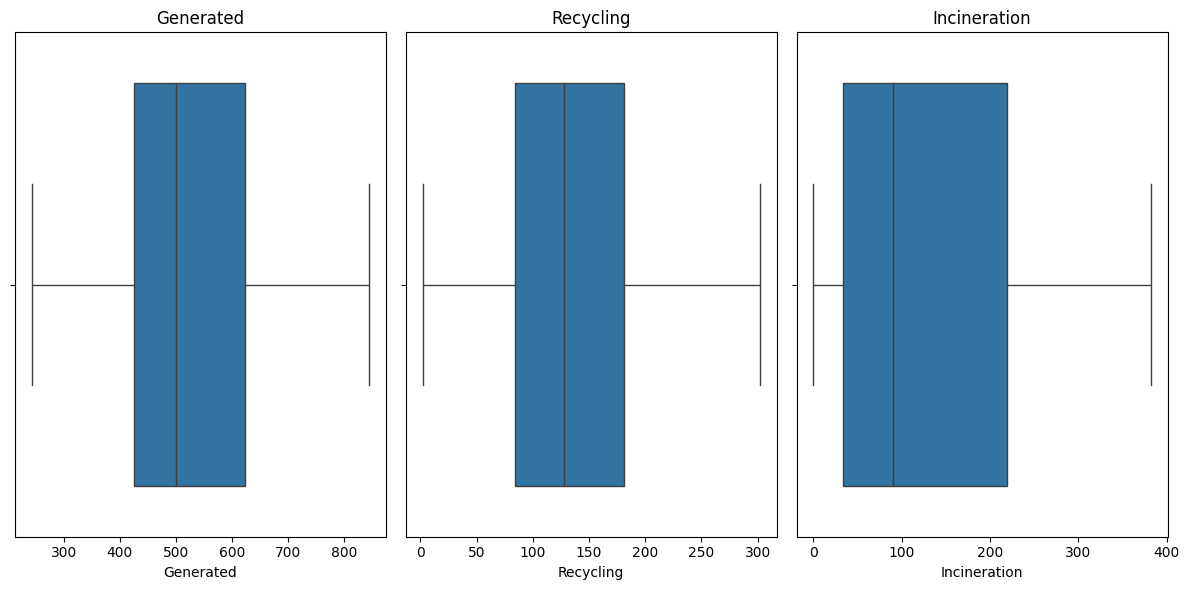

In [4]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Generated', 'Recycling', 'Incineration']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Interpretation
- Frequency plots show skewness in data distribution.
- Box plots reveal the presence of outliers, especially in `Generated` and `Recycling`.

# Analysis

In [5]:
df.corr()

,Generated,Recycling,Incineration,Score
Generated,1.000000,0.686666,0.384229,0.170497
Recycling,0.686666,1.000000,0.526454,0.500987
Incineration,0.384229,0.526454,1.000000,0.687065
Score,0.170497,0.500987,0.687065,1.000000


In [6]:

# Simple Regression Example
X_simple = df[['Recycling']]
y = df['Score']
X_simple = sm.add_constant(X_simple)
model_simple = sm.OLS(y, X_simple).fit()
print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     12.06
Date:                Thu, 24 Apr 2025   Prob (F-statistic):            0.00136
Time:                        14:16:12   Log-Likelihood:                -166.18
No. Observations:                  38   AIC:                             336.4
Df Residuals:                      36   BIC:                             339.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.9799      6.501      7.226      0.0

In [7]:
# Multiple Regression
X_multi = df[['Generated', 'Recycling', 'Incineration']]
X_multi = sm.add_constant(X_multi)
model_multi = sm.OLS(y, X_multi).fit()
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     14.72
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           2.61e-06
Time:                        14:16:12   Log-Likelihood:                -155.85
No. Observations:                  38   AIC:                             319.7
Df Residuals:                      34   BIC:                             326.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           62.0936      9.275      6.695   

### Interpretation
- Correlation shows how strongly each predictor is linked to the score.
- Model with lowest p-values, highest adjusted R², and a strong F-statistic is recommended.
- Interpret these values in terms of significance and model fit.